In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [12]:
sample = np.random.choice([1,2,3,4,5,6], 100)

In [6]:
sample

array([2, 6, 2, 2, 1, 4, 4, 2, 2, 6, 1, 5, 2, 1, 2, 1, 5, 2, 6, 1, 2, 5, 5,
       6, 2, 2, 1, 4, 3, 3, 5, 6, 5, 5, 2, 3, 3, 6, 6, 3, 1, 5, 1, 6, 3, 6,
       2, 6, 6, 3, 1, 1, 6, 3, 6, 5, 6, 2, 6, 6, 5, 2, 2, 2, 1, 4, 5, 6, 4,
       4, 1, 6, 5, 4, 1, 2, 5, 6, 4, 3, 6, 2, 2, 5, 6, 3, 5, 1, 1, 5, 5, 4,
       4, 5, 2, 5, 6, 1, 3, 4])

In [30]:
import math
mu = 1197.69
sigma = 116182.2
round(mu + 3*math.sqrt(sigma),2)

2220.26

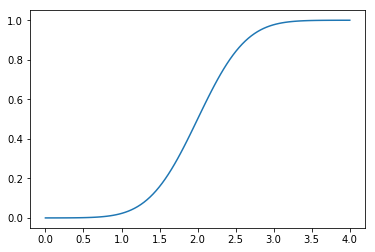

In [50]:
mu=2.
sigma=0.5
norm_rv=sts.norm(loc=mu, scale=sigma)
x=np.linspace(0, 4, 100)
norm_cdf=norm_rv.cdf(x)
plt.plot(x, norm_cdf)

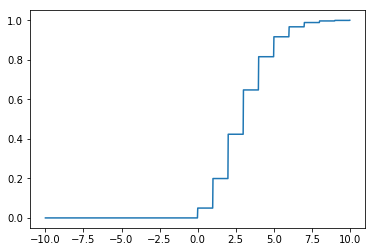

In [66]:
pois = sts.poisson(3)
round(pois.cdf(0), 2)
y = np.linspace(-10,10, 1000)
pois_cdf=pois.cdf(y)
plt.plot(y, pois_cdf)

In [69]:
mu=1197.69
sigma_square=116182.2
sigma=math.sqrt(sigma_square)
round(mu+3*sigma,2 )

2220.26

In [77]:
n=2016-1885
print round(math.sqrt(sigma_square/n),2)

29.78


In [79]:
mu+3.*29.78

1287.03

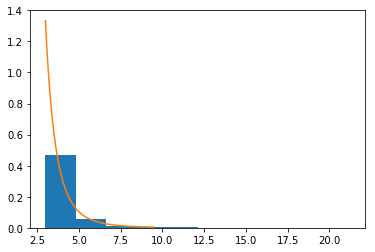

In [372]:
from scipy.stats import pareto

x0=3
k=4

pareto_rv=pareto(k, loc=0, scale=x0)
sample=np.linspace(pareto_rv.ppf(0.00), pareto_rv.ppf(0.99), 1000)
pareto_rvs=pareto_rv.rvs(1000)
plt.hist(pareto_rvs, normed=True)
plt.plot(sample, pareto_rv.pdf(sample))

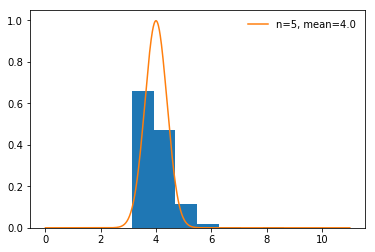

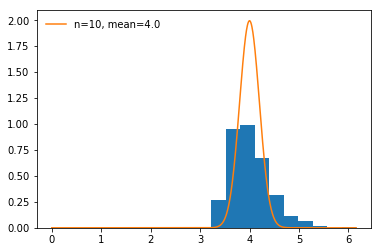

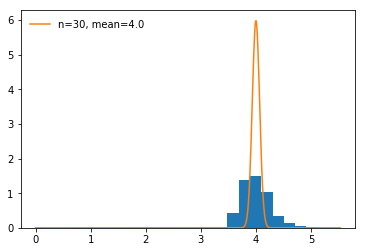

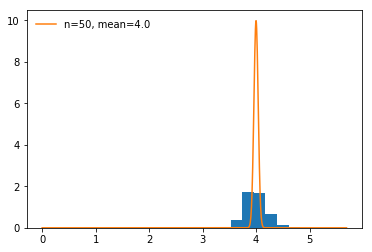

In [375]:
for n in [5, 10, 30, 50]:
    m=[]
    for i in range(0, 1000):
        mean=pareto_rv.rvs(n).mean()
        m.append(mean)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.hist(m, normed=True)
    norm_rv = sts.norm(pareto_rv.mean(), pareto_rv.var()/n)
    x = np.linspace(0, max(m), 1000)    
    ax.plot(x, norm_rv.pdf(x), label='n='+str(n)+', mean='+str(round(pareto_rv.mean(), 2)))
    ax.legend(loc='best', frameon=False)